# Uniaxial Steel Models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, linspace, pi
from opensees import uniaxial
from opensees.units.english import ksi, psi, inch, ft

plt.style.use("typewriter")

## Define Properties

In [2]:
Fy  = 66.8*ksi             # steel yield stress
Es  = 29000.*ksi           # modulus of steel
Bs  = 0.005                # strain-hardening ratio 
R0  = 18                   # control the transition from elastic to plastic branches
cR1 = 0.925                # control the transition from elastic to plastic branches
cR2 = 0.15                 # control the transition from elastic to plastic branches

## Perform the Analysis

RambergOsgoodSteel unaxial material - Written by R.Rahimi & R.Sepasdar & Dr. Mo. R. Banan Shiraz University Copyright 2012; 
Dodd_Restrepo unaxial material - Written by L.L. Dodd & J. Restepo


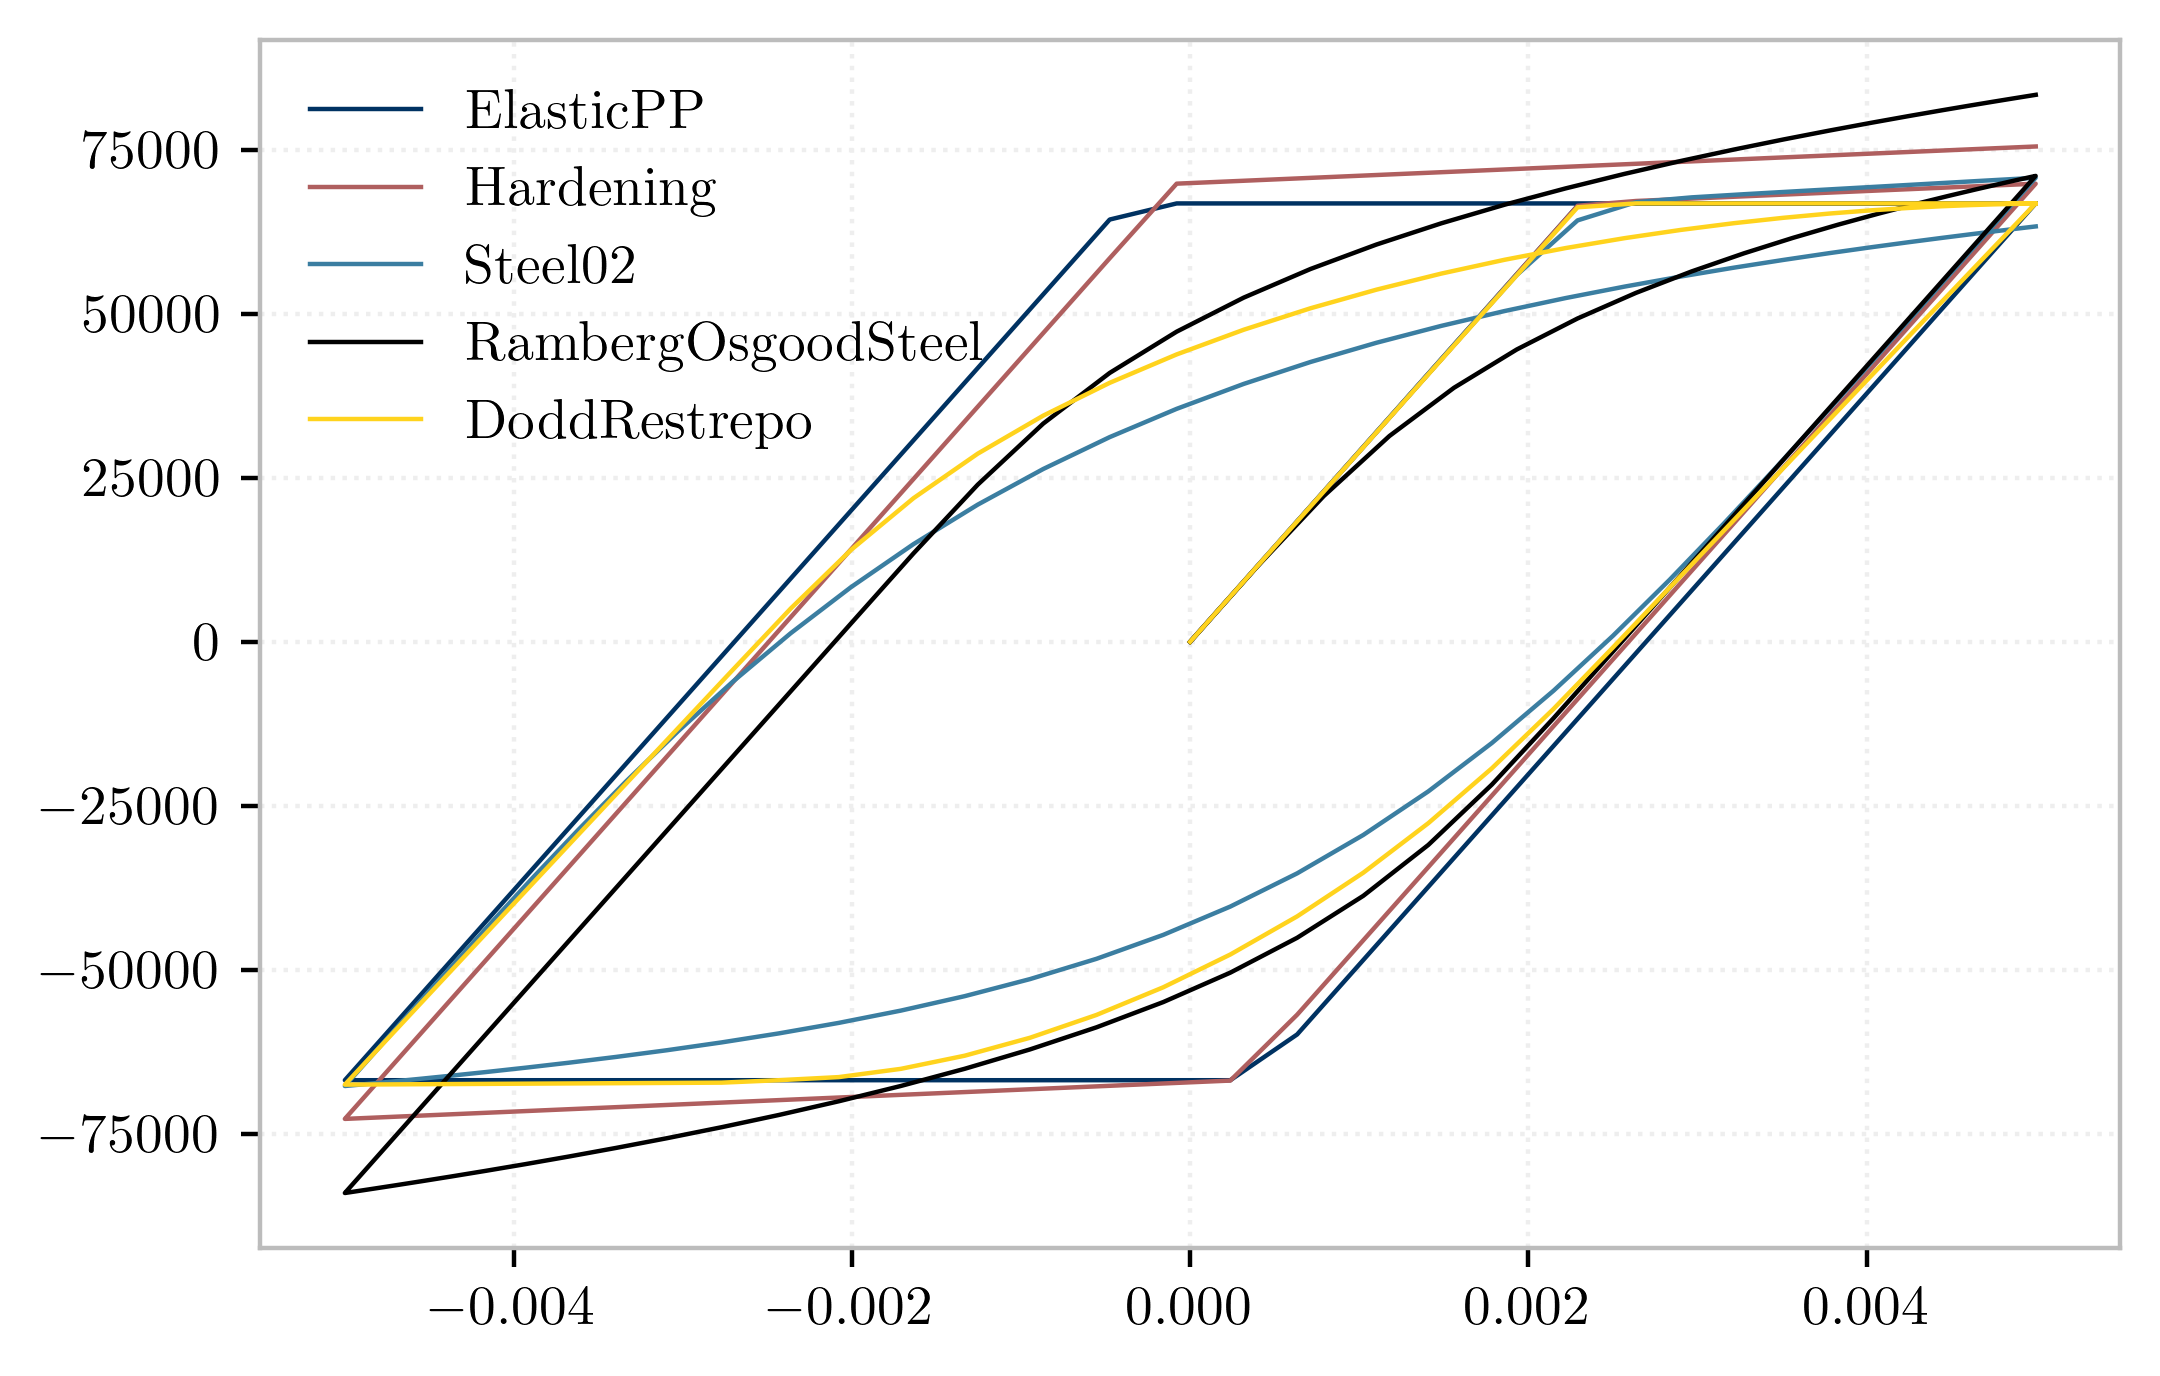

In [3]:
strain = 0.005*sin(linspace(0, 2.5*pi, 100))

fig, ax = plt.subplots()

# with uniaxial.Steel01(1, 60e3, Es, 0.05, 10.) as steel:
#     ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="Steel01")

with uniaxial.ElasticPP(1, Es, Fy/Es) as steel:
    
    stress = [steel.getStress(e, commit=True) for e in strain]
    
    ax.plot(strain, stress, label="ElasticPP")

with uniaxial.Hardening(1, Es, Fy, 0.02*Es, 0.02*Es) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="Hardening")

with uniaxial.Steel02(1, Fy, Es, 0.05, 18.) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="Steel02")

with uniaxial.RambergOsgoodSteel(1, Fy, Es, 0.002, 4) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="RambergOsgoodSteel")


esh, esu = 10*Fy/Es, 14*Fy/Es
eshi = (esu + 5*esh)/5
with uniaxial.DoddRestrepo(1, Fy, 1.2*Fy, esh, esu, Es, eshi, 1.1*Fy) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="DoddRestrepo")


# uniaxial.Bond_SP01(1, Fy, Sy=1.0, Fu=1.4*Fy, Su=, b=, R=)

ax.legend();

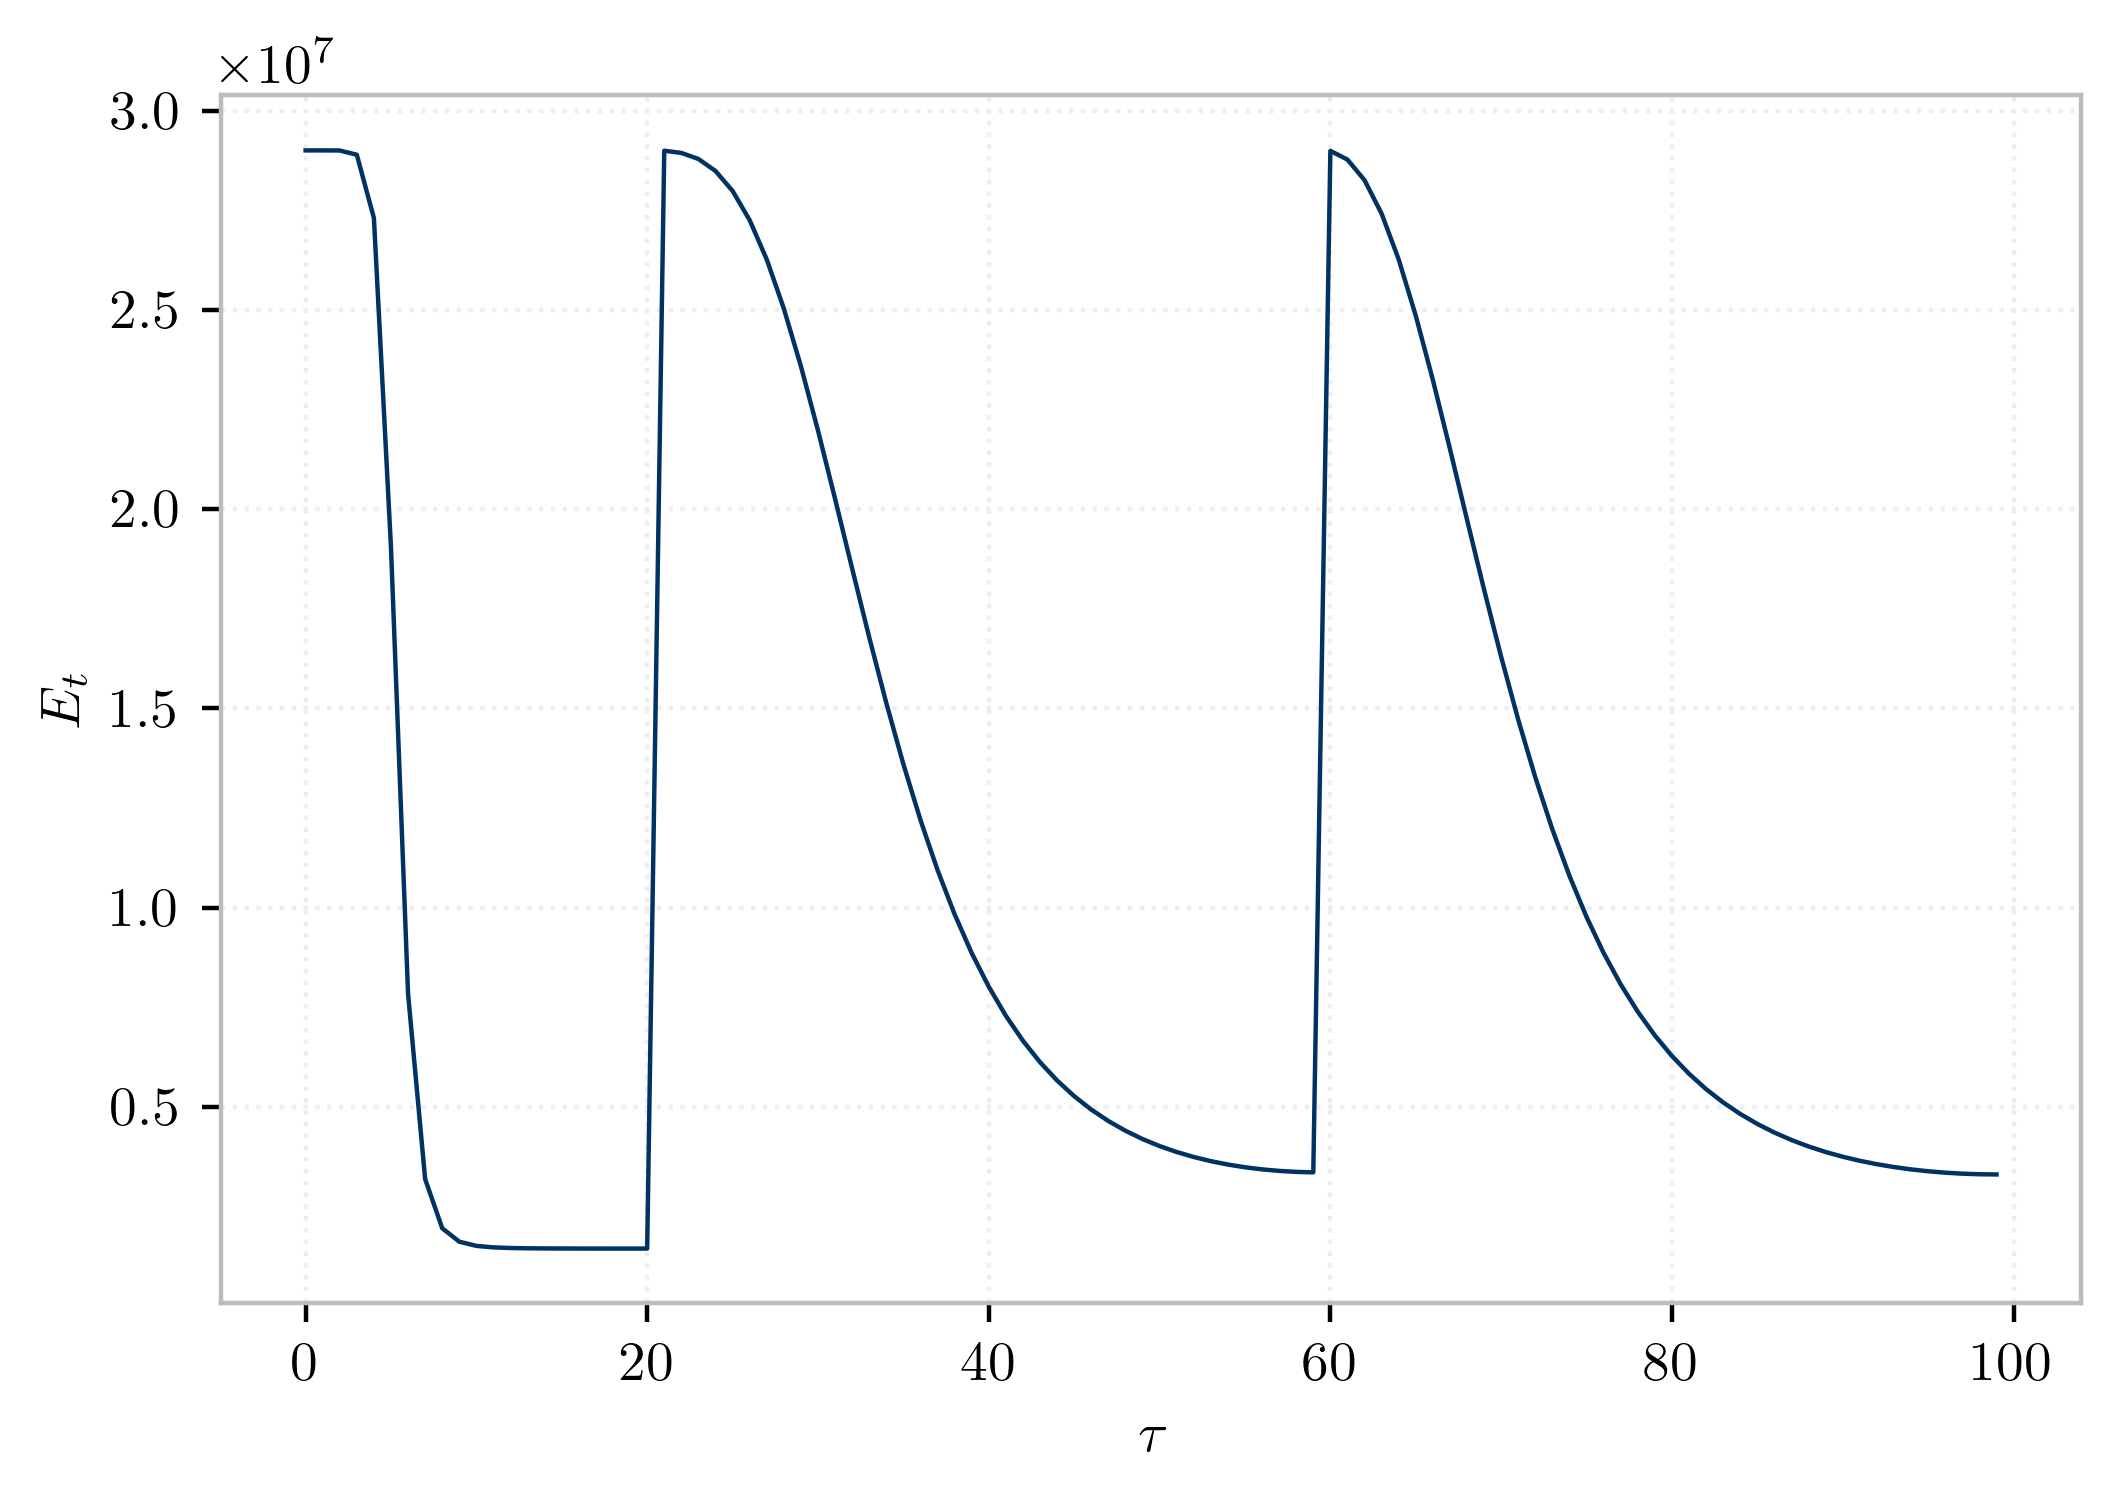

In [4]:
tangent = []
fig, ax = plt.subplots()

with uniaxial.Steel02(1, 60e3, 29e6, 0.05, 10.) as steel:

    for e in strain:
        steel.setTrialStrain(e)
        Et = steel.getTangent()
        tangent.append(Et)
        steel.commitState()
        

        
ax.plot(tangent)
ax.set_ylabel("$E_t$")
ax.set_xlabel(r"$\tau$");